In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('Traffic.csv')

#DATA SUMMARIZATION
data.describe(include='all')

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,2976,2976.000000,2976,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976
unique,96,NaN,7,NaN,NaN,NaN,NaN,NaN,4
top,12:00:00 AM,NaN,Tuesday,NaN,NaN,NaN,NaN,NaN,normal
freq,31,NaN,480,NaN,NaN,NaN,NaN,NaN,1669
mean,NaN,16.000000,NaN,68.696573,14.917339,15.279570,15.324933,114.218414,NaN
std,NaN,8.945775,NaN,45.850693,12.847518,14.341986,10.603833,60.190627,NaN
min,NaN,1.000000,NaN,6.000000,0.000000,0.000000,0.000000,21.000000,NaN
25%,NaN,8.000000,NaN,19.000000,5.000000,1.000000,6.000000,55.000000,NaN
50%,NaN,16.000000,NaN,64.000000,12.000000,12.000000,14.000000,109.000000,NaN
75%,NaN,24.000000,NaN,107.000000,22.000000,25.000000,23.000000,164.000000,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


<Axes: >

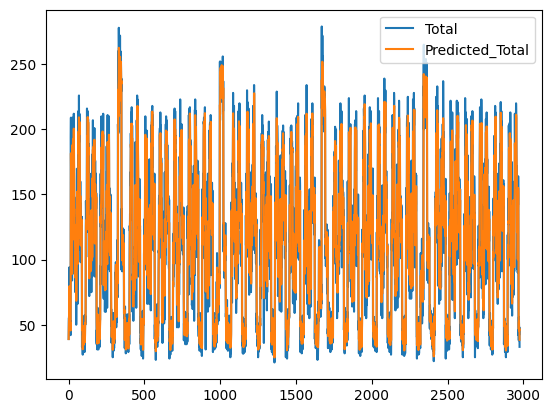

In [4]:
import numpy as np
import pandas as pd


# Initialize the necessary matrices and variables
A_matrix = np.eye(2)
H_matrix = np.eye(2)
Q_matrix = np.eye(2)
R_matrix = np.eye(2)
initial_traffic_volume = data['Total'].iloc[0]
initial_speed = 0  # Assuming initial speed is 0
initial_state_variance = 1
total_time_steps = len(data)

previous_state = np.array([initial_traffic_volume, initial_speed])
previous_covariance = np.eye(2) * initial_state_variance

predicted_traffic_volumes = []

# Run the Kalman filter in a loop for each time step
for time_step in range(total_time_steps):
    # Get current measurement (traffic volume)
    current_measurement = np.array([data['Total'].iloc[time_step], 0])  # Assuming speed is not available

    # Prediction step
    predicted_state = A_matrix.dot(previous_state)
    predicted_covariance = A_matrix.dot(previous_covariance).dot(A_matrix.T) + Q_matrix

    # Kalman gain
    kalman_gain = predicted_covariance.dot(H_matrix.T).dot(np.linalg.inv(H_matrix.dot(predicted_covariance).dot(H_matrix.T) + R_matrix))

    # Update step
    updated_state = predicted_state + kalman_gain.dot(current_measurement - H_matrix.dot(predicted_state))
    updated_covariance = (np.eye(2) - kalman_gain.dot(H_matrix)).dot(predicted_covariance)

    # Store results
    predicted_traffic_volume = updated_state[0]
    predicted_traffic_volumes.append(predicted_traffic_volume)

    # Update for next iteration
    previous_state = updated_state
    previous_covariance = updated_covariance

# Output or store predicted traffic flow values
data['Predicted_Total'] = predicted_traffic_volumes
data[['Total', 'Predicted_Total']].plot()

In [5]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming y_true are the true values and y_pred are the predicted values
y_true = data['Total']
y_pred = data['Predicted_Total']  # Replace this with your predictions

print("Prediction Scores")
# Calculate R2
r2 = r2_score(y_true, y_pred)
print(f'R-squared: {r2}')

# Calculate RMSE

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Prediction Scores
R-squared: 0.9586926898539032
Root Mean Squared Error: 12.231207906283137


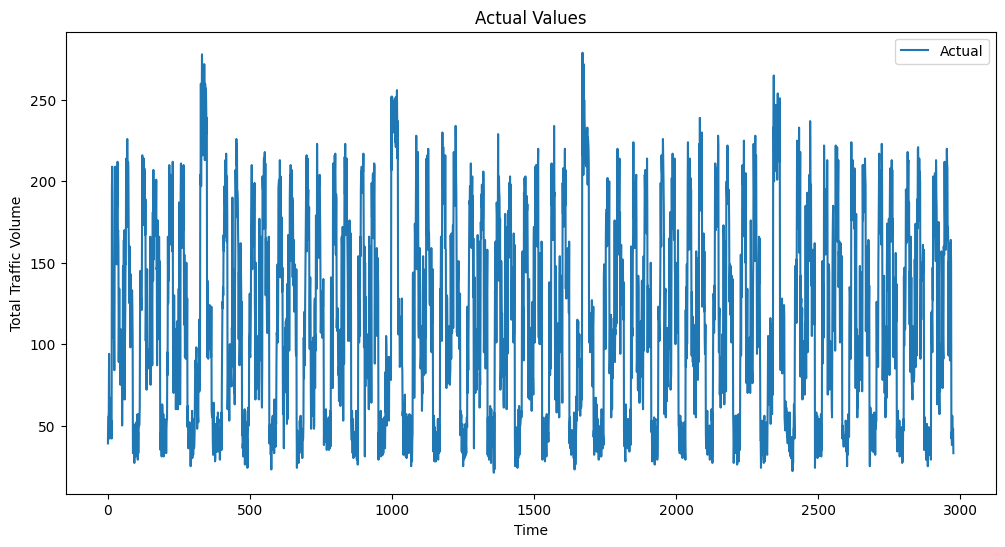

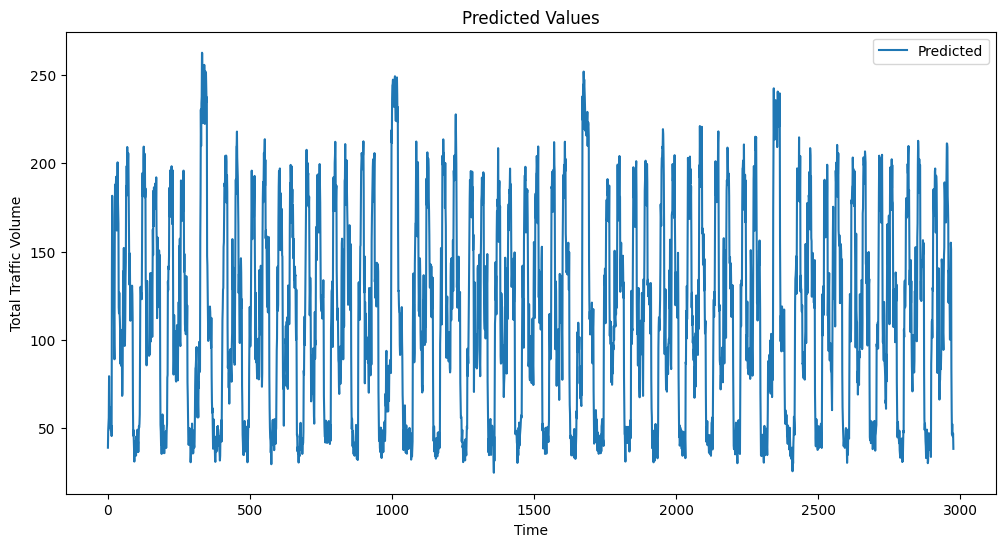

In [6]:
y_true = data['Total']
y_pred = data['Predicted_Total']  # Replace this with your predictions

# Create a new DataFrame for plotting
data_plot = pd.DataFrame({'Actual': y_true, 'Predicted': y_pred})

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data_plot.index, data_plot['Actual'], label='Actual')
plt.title('Actual Values')
plt.xlabel('Time')
plt.ylabel('Total Traffic Volume')
plt.legend()
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data_plot.index, data_plot['Predicted'], label='Predicted')
plt.title('Predicted Values')
plt.xlabel('Time')
plt.ylabel('Total Traffic Volume')
plt.legend()
plt.show()

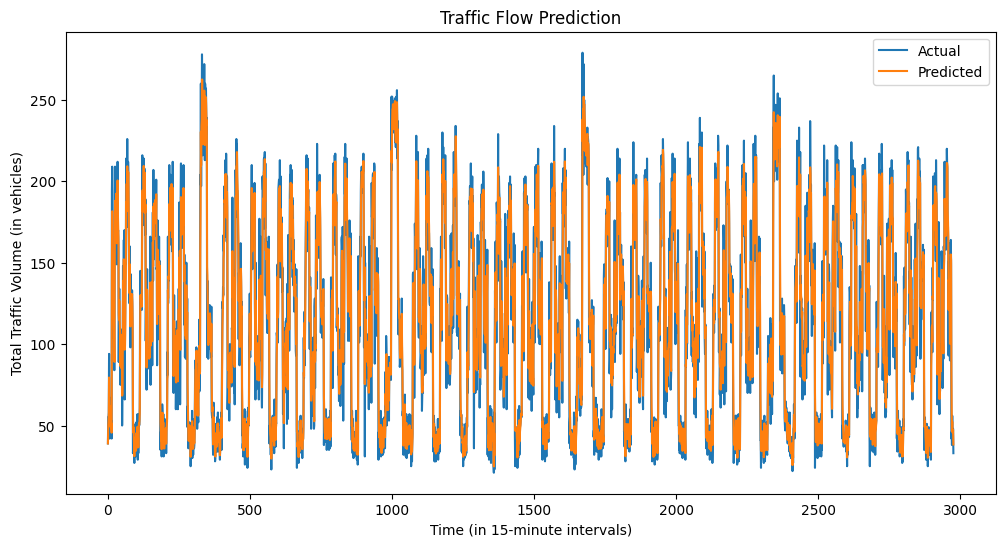

In [8]:


# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total'], label='Actual')
plt.plot(data.index, data['Predicted_Total'], label='Predicted')
plt.title('Traffic Flow Prediction')
plt.xlabel('Time (in 15-minute intervals)')
plt.ylabel('Total Traffic Volume (in vehicles)')
plt.legend()
plt.show()